The objective of this challenge is to design and build a predictive model capable of accurately determining the probability of an individual having heart disease.

**EVALUATION**

The error metric for this competition is Accuracy.
However, we will also focus on **precision and recall** of the model predictions by taking some trade-off between them. Also finding the threshold for categorising the predictions probability in either 0:No or 1:Yes.


**NOTE:**

Let keep it in mind that one of the best evaluation metric will be the  ROC-AUC score and the F1 score.

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [2]:
train = pd.read_csv('./data/Train Dataset .csv')
test = pd.read_csv('./data/Test Dataset.csv')
variable_desc = pd.read_csv("./data/Variable_Definitions.csv")

In [3]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [4]:
vd = variable_desc.to_dict()
keys =train.columns.tolist()[1:]
v_ds = {key:v for v, key in zip(list(vd['Variable defination'].values()), keys)}
v_ds

{'Age': 'age',
 'Sex': 'sex',
 'cp': 'chest pain type (4 values)',
 'trestbps': 'resting blood pressure',
 'chol': 'serum cholestoral in mg/dl',
 'fbs': 'fasting blood sugar > 120 mg/dl',
 'restecg': 'resting electrocardiographic results (values 0,1,2)',
 'thalach': 'maximum heart rate achieved',
 'exang': 'exercise induced angina',
 'oldpeak': 'oldpeak = ST depression induced by exercise relative to rest',
 'slope': 'the slope of the peak exercise ST segment',
 'ca': 'number of major vessels (0-3) colored by flourosopy',
 'thal': 'thal: 0 = normal; 1 = fixed defect; 2 = reversable defect'}

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [6]:
traincols = train.columns.to_list()
traincols.remove('target')
test.columns = traincols
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2697 non-null   int64  
 1   Age       2697 non-null   int64  
 2   Sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [7]:
cat_cols = []
for feature in train.columns:
    if feature not in ['id', 'target']:
        nunique = train[feature].nunique()
        unique = train[feature].unique()
        if nunique <10:
            cat_cols.append(feature)
            print(f"{feature} has {unique}")
        else:
            print(f"{feature} has {nunique} unique values")
train[cat_cols] = train[cat_cols].astype('category')
test[cat_cols] = test[cat_cols].astype('category')

Id has 7303 unique values
Age has 49 unique values
Sex has [0 1]
cp has [1 2 0 3]
trestbps has 107 unique values
chol has 439 unique values
fbs has [1 0]
restecg has [0 1 2]
thalach has 132 unique values
exang has [0 1]
oldpeak has 63 unique values
slope has [1 2 0]
ca has [4 1 3 2 0]
thal has [1 0 2 3]


## VISUALS


The target that we will be predicting is inbalanced with 0 and 1 having about 20% and 80% respectively. 

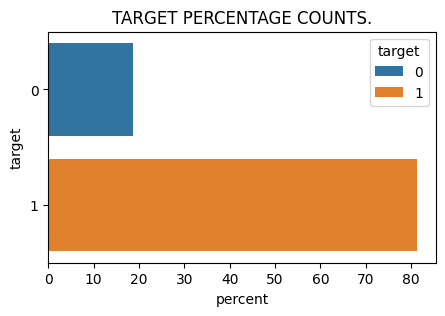

In [8]:
plt.figure(figsize=(5,3))

sns.countplot(data=train, y='target', hue='target', stat='percent')
plt.title('TARGET PERCENTAGE COUNTS.')
plt.show()

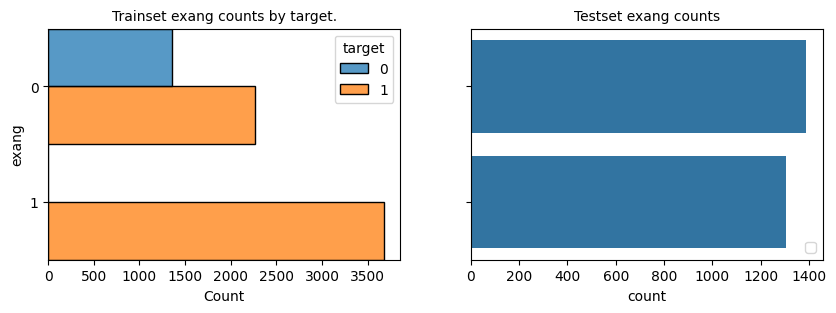

In [9]:
fig, axs = plt.subplots(1,2, figsize=(10,3), sharey=True)
# plt.figure(figsize=(5,5))
sns.histplot(data=train, y='exang', hue='target', stat='count', 
             common_norm=False, discrete=True, multiple='dodge', ax=axs[0],
)
axs[0].set_title(f"Trainset exang counts by target.")
axs[0].set_yticks(train['exang'].unique().to_list())
axs[0].title.set_size(10)
sns.countplot(test, y='exang', ax=axs[1])
axs[1].set_yticks(train['exang'].unique().to_list())
axs[1].set_title('Testset exang counts')
axs[1].title.set_size(10)
plt.legend([])
plt.show()

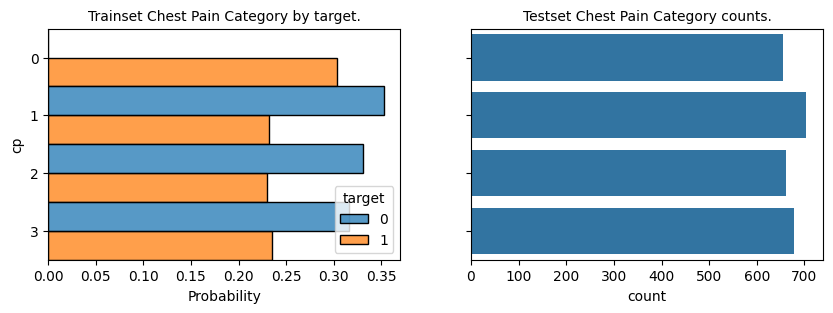

In [10]:
fig, axs = plt.subplots(1,2, figsize=(10,3), sharey=True)
# plt.figure(figsize=(5,5))
sns.histplot(data=train, y='cp', hue='target', stat='probability', 
             common_norm=False, discrete=True, multiple='dodge', ax=axs[0],
)
axs[0].set_title(f"Trainset Chest Pain Category by target.")
axs[0].set_yticks(train['cp'].unique().to_list())
axs[0].title.set_size(10)
sns.countplot(test, y='cp', ax=axs[1])
axs[1].set_title(f"Testset Chest Pain Category counts.")
axs[1].title.set_size(10)
axs[1].set_yticks(train['cp'].unique().to_list())
plt.show()

Patients having chest pain of category 0 have high chance of heart disease than other category.

### EXERCISE INDUCED ANGINA (exang)

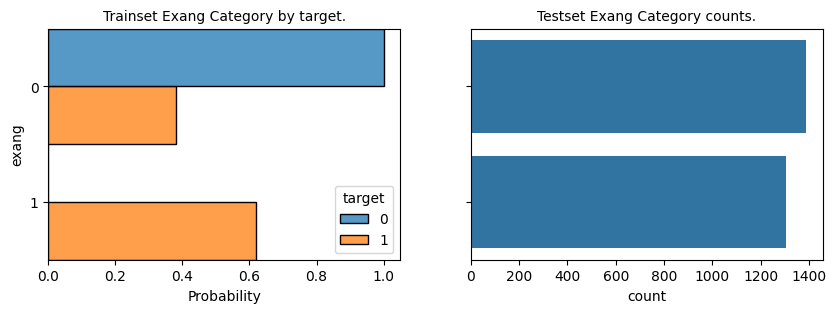

In [11]:
fig, axs = plt.subplots(1,2, figsize=(10,3), sharey=True)
# plt.figure(figsize=(5,5))
sns.histplot(data=train, y='exang', hue='target', stat='probability', 
             common_norm=False, discrete=True, multiple='dodge', ax=axs[0],
)
axs[0].set_title(f"Trainset Exang Category by target.")
axs[0].set_yticks(train['exang'].unique().to_list())
axs[0].title.set_size(10)

sns.countplot(test, y='exang', ax=axs[1])
axs[1].set_title(f"Testset Exang Category counts.")
axs[1].title.set_size(10)
axs[1].set_yticks(test['exang'].unique().to_list())
plt.show()

Question:

What category of chest pain do patients with exercise induced anginia have?.

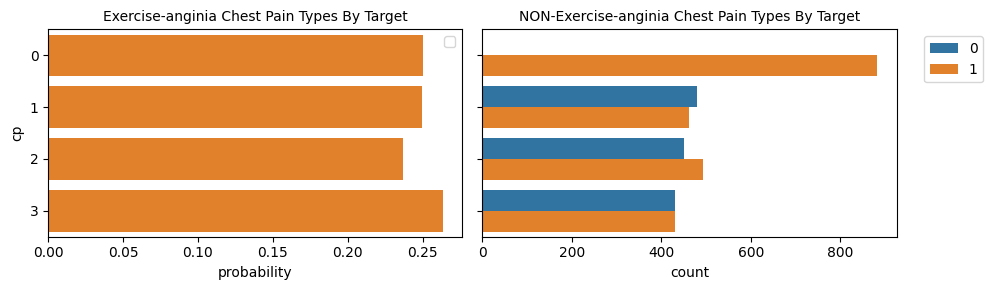

In [12]:
exang1 = train[train['exang']==1]
exang0 = train[train['exang']==0]

fig, axs = plt.subplots(1,2,figsize=(10,3), sharey=True)
sns.countplot(exang1, y='cp', hue='target', ax=axs[0], stat='probability', hue_order=[0, 1])
axs[0].legend([])
sns.countplot(exang0, y='cp', hue='target', ax=axs[1], stat='count')
axs[0].set_title('Exercise-anginia Chest Pain Types By Target')  
axs[1].set_title('NON-Exercise-anginia Chest Pain Types By Target') 
axs[0].title.set_size(10)
axs[1].title.set_size(10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()  

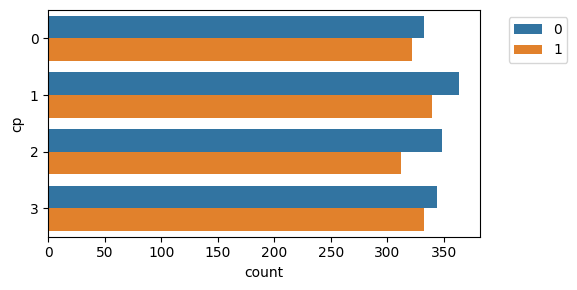

In [13]:
plt.figure(figsize=(5,3))

sns.countplot(test, y='cp', hue='exang')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

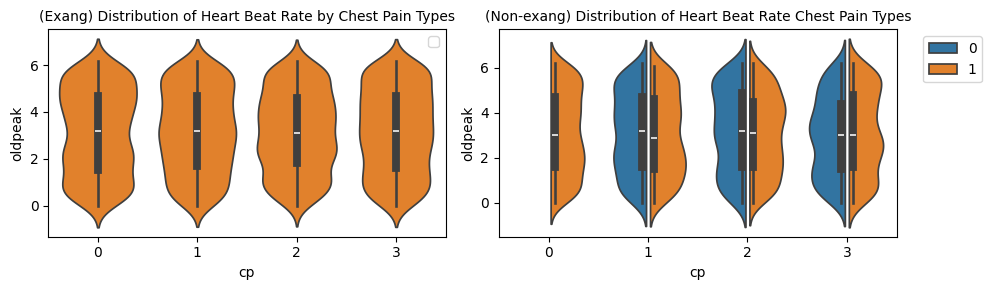

In [14]:
fig, axs = plt.subplots(1,2,figsize=(10,3), sharey=False)
sns.violinplot(exang1, x='cp', y='oldpeak', hue='target', ax=axs[0], hue_order=[0, 1])
axs[0].legend([])
sns.violinplot(exang0, x='cp', y='oldpeak',hue='target', split=True, gap=0.1, ax=axs[1])
axs[0].set_title('(Exang) Distribution of Heart Beat Rate by Chest Pain Types')  
axs[1].set_title('(Non-exang) Distribution of Heart Beat Rate Chest Pain Types') 
axs[0].title.set_size(10)
axs[1].title.set_size(10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

**INSIGHTS**

* Individuals with *Exercise induced Angina* have high chance of heart disease.
* Individuals with *chest pain (0)* have heart disease.
*  

## Preprocessing.

* Transform categorical features with more than two unique entries with onehot.


In [15]:
from sklearn.preprocessing import OneHotEncoder

catcols = ['thal', 'cp', 'restecg', 'ca', 'slope']

onehot = OneHotEncoder(dtype=np.int32, sparse_output=False)
train_encoded = pd.DataFrame(onehot.fit_transform(train[cat_cols]), 
                             columns=onehot.get_feature_names_out(cat_cols))

test_encoded = pd.DataFrame(onehot.transform(test[cat_cols]), 
                            columns=onehot.get_feature_names_out(cat_cols))

traindf = train.merge(train_encoded, left_index=True, right_index=True, how='inner')
testdf = test.merge(test_encoded, left_index=True, right_index=True, how='inner')

traindf.shape,  testdf.shape

((7303, 40), (2697, 39))

In [16]:
traindf.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,16167,33,0,1,158,205,1,0,154,0,...,0,0,0,0,0,1,0,1,0,0
1,11275,53,1,2,198,154,0,1,104,0,...,1,0,1,0,0,0,1,0,0,0
2,13251,37,1,2,101,202,1,0,155,0,...,0,0,0,0,1,0,0,1,0,0
3,19921,75,0,0,113,306,1,2,88,1,...,0,0,0,1,0,0,0,0,1,0
4,11293,35,1,2,139,419,1,1,166,1,...,1,0,0,0,0,1,1,0,0,0


In [17]:
ind = train[(train['exang']==0) & (train['cp']!= 0)]#.index
# traindf.drop(ind, axis=0, inplace=True)
ind['target'].value_counts(normalize=True)

target
1    0.504006
0    0.495994
Name: proportion, dtype: float64

In [18]:
traindf['target'].value_counts(normalize=True)

target
1    0.813501
0    0.186499
Name: proportion, dtype: float64

**The model may have confusion rate of about 0.19 for observations that doesnot fall under the following:
Exercise Induced Anginia: No (0)
Chest Pain categories excludiing zero(0).**

# Modelling.


In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold, FixedThresholdClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score


In [20]:
to_drop = ['Id', 'target',
           'fbs', 'Sex', 'exang',
        'restecg', 
        'ca', 'chol',
           'thal', 'cp', 'slope']
           
           
X_train, X_val, y_train, y_val = train_test_split(traindf.drop(to_drop, axis=1), traindf['target'],
                                                  test_size=0.1, random_state=24, stratify=traindf['target'])

X_train.shape, X_val.shape   

((6572, 29), (731, 29))

## Logistic Regression.

In [21]:

lr = LogisticRegressionCV(random_state=24,  max_iter=10000, class_weight={0:1180, 1:1000},
                        penalty='l2', solver='newton-cg')   

lrpipe = make_pipeline(MinMaxScaler(), lr)
lrpipe.fit(X_train, y_train)

# Evaluate the model.
lrpred = lrpipe.predict(X_val)
print(f"Train ROC-AUC SCORE: {roc_auc_score(y_train, lrpipe.predict(X_train))}")
print(f"Test ROC-AUC SCORE: {roc_auc_score(y_val, lrpred)}")
print(classification_report(y_val, lrpred))


Train ROC-AUC SCORE: 0.8270800873211603
Test ROC-AUC SCORE: 0.8376050420168069
              precision    recall  f1-score   support

           0       0.54      0.84      0.66       136
           1       0.96      0.84      0.89       595

    accuracy                           0.84       731
   macro avg       0.75      0.84      0.78       731
weighted avg       0.88      0.84      0.85       731



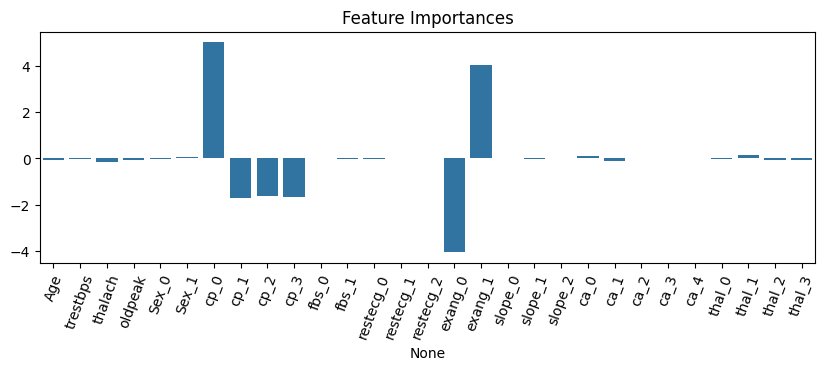

In [22]:
# plot model feature importances.

feature_importances = lr.coef_[0]
plt.figure(figsize=(10,3)) 
sns.barplot(x=X_train.columns, y=feature_importances)
plt.title("Feature Importances")
plt.xticks(rotation=70)
plt.show()

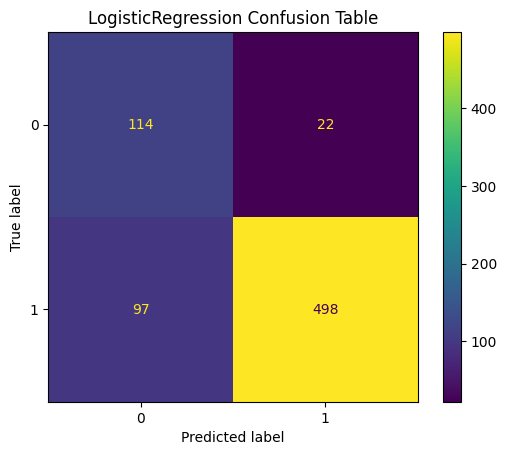

In [23]:
cm = confusion_matrix(y_val, lrpred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot()
plt.title('LogisticRegression Confusion Table')
plt.show()

## RandomForest.

In [24]:
rfclf = RandomForestClassifier(random_state=24, criterion='gini',
                               class_weight={0:90, 1:110},
                               n_estimators=150, max_depth=11, min_samples_split=5, #max_depth=8
                                 max_features=1.0, oob_score=True, n_jobs=-1)
rfclf.fit(X_train, y_train)

# Evaluate the model.
print(f"Train ROC-AUC SCORE: {roc_auc_score(y_train, rfclf.predict(X_train))}")
rfpred = rfclf.predict(X_val)
print(f"Validation ROC-AUC SCORE: {roc_auc_score(y_val, rfpred)}")
print(classification_report(y_val, rfpred))

Train ROC-AUC SCORE: 0.9070821196070424
Validation ROC-AUC SCORE: 0.598109243697479
              precision    recall  f1-score   support

           0       0.52      0.25      0.34       136
           1       0.85      0.95      0.89       595

    accuracy                           0.82       731
   macro avg       0.68      0.60      0.62       731
weighted avg       0.78      0.82      0.79       731



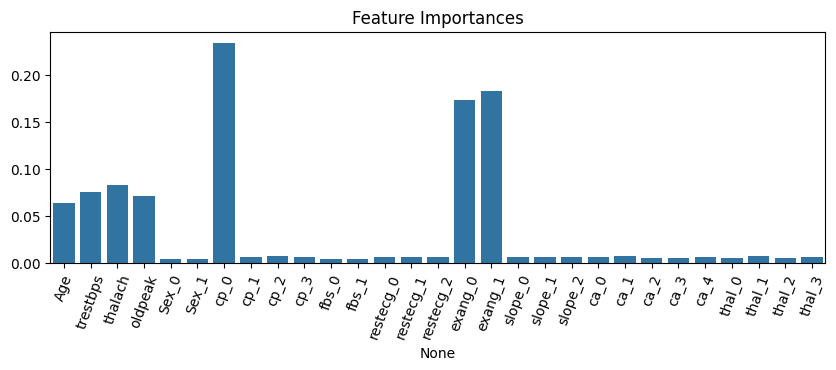

In [25]:
# plot model feature importances.

feature_importances = rfclf.feature_importances_
plt.figure(figsize=(10,3)) 
sns.barplot(x=X_train.columns, y=feature_importances)
plt.title("Feature Importances")
plt.xticks(rotation=70)
plt.show()

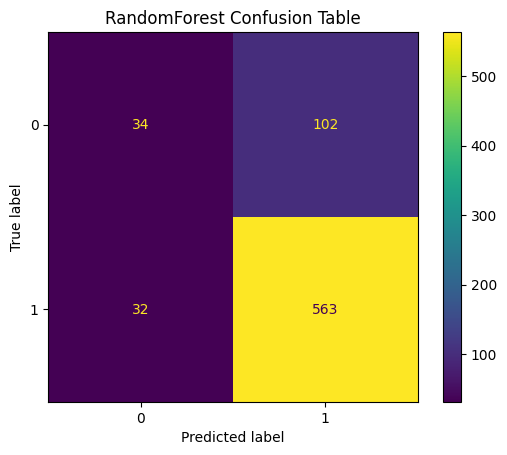

In [26]:
cm = confusion_matrix(y_val, rfpred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot()
plt.title('RandomForest Confusion Table')
plt.show()

In [27]:
from sklearn.model_selection import TunedThresholdClassifierCV

tuned_model = TunedThresholdClassifierCV(
    estimator=rfclf, 
    scoring='roc_auc', store_cv_results=True,  # necessary to inspect all results
)
tuned_model.fit(X_train, y_train)
print(f"{tuned_model.best_threshold_=:0.2f}")
print(f"{tuned_model.best_score_=:0.2f}")

tuned_model.best_threshold_=0.78
tuned_model.best_score_=0.88


### Utility

In [28]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

from sklearn.metrics import confusion_matrix


def fpr_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    tn, fp, _, _ = cm.ravel()
    tnr = tn / (tn + fp)
    return 1 - tnr


from sklearn.metrics import make_scorer, precision_score, recall_score

tpr_score = recall_score  # TPR and recall are the same metric
scoring = {
    "precision": make_scorer(precision_score, pos_label=1),
    "recall": make_scorer(recall_score, pos_label=1),
    "fpr": make_scorer(fpr_score, neg_label=0, pos_label=1),
    "tpr": make_scorer(tpr_score, pos_label=1),
}

import numpy as np


def credit_gain_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    # The rows of the confusion matrix hold the counts of observed classes
    # while the columns hold counts of predicted classes. Recall that here we
    # consider "bad" as the positive class (second row and column).
    # Scikit-learn model selection tools expect that we follow a convention
    # that "higher" means "better", hence the following gain matrix assigns
    # negative gains (costs) to the two kinds of prediction errors:
    # - a gain of -1 for each false positive ("good" credit labeled as "bad"),
    # - a gain of -5 for each false negative ("bad" credit labeled as "good"),
    # The true positives and true negatives are assigned null gains in this
    # metric.
    #
    # Note that theoretically, given that our model is calibrated and our data
    # set representative and large enough, we do not need to tune the
    # threshold, but can safely set it to the cost ration 1/5, as stated by Eq.
    # (2) in Elkan paper [2]_.
    gain_matrix = np.array(
        [
            [0, -2],  # -1 gain for false positives
            [-10, 0],  # -5 gain for false negatives
        ]
    )
    return np.sum(cm * gain_matrix)


scoring["cost_gain"] = make_scorer(
    credit_gain_score, neg_label=0, pos_label=1
)



def plot_roc_pr_curves(vanilla_model, tuned_model, *, title):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

    linestyles = ("dashed", "dotted")
    markerstyles = ("o", ">")
    colors = ("tab:blue", "tab:orange")
    names = ("Vanilla model", "Tuned model")
    for idx, (est, linestyle, marker, color, name) in enumerate(
        zip((vanilla_model, tuned_model), linestyles, markerstyles, colors, names)
    ):
        decision_threshold = getattr(est, "best_threshold_", 0.5)
        PrecisionRecallDisplay.from_estimator(
            est,
            X_val,
            y_val,
            pos_label=1,
            linestyle=linestyle,
            color=color,
            ax=axs[0],
            name=name,
        )
        axs[0].plot(
            scoring["recall"](est, X_val, y_val),
            scoring["precision"](est, X_val, y_val),
            marker,
            markersize=10,
            color=color,
            label=f"Cut-off point at probability of {decision_threshold:.2f}",
        )
        RocCurveDisplay.from_estimator(
            est,
            X_val,
            y_val,
            pos_label=1,
            linestyle=linestyle,
            color=color,
            ax=axs[1],
            name=name,
            plot_chance_level=idx == 1,
        )
        axs[1].plot(
            scoring["fpr"](est, X_val, y_val),
            scoring["tpr"](est, X_val, y_val),
            marker,
            markersize=10,
            color=color,
            label=f"Cut-off point at probability of {decision_threshold:.2f}",
        )

    axs[0].set_title("Precision-Recall curve")
    axs[0].legend()
    axs[1].set_title("ROC curve")
    axs[1].legend()

    axs[2].plot(
        tuned_model.cv_results_["thresholds"],
        tuned_model.cv_results_["scores"],
        color="tab:orange",
    )
    axs[2].plot(
        tuned_model.best_threshold_,
        tuned_model.best_score_,
        "o",
        markersize=10,
        color="tab:orange",
        label="Optimal cut-off point for the business metric",
    )
    axs[2].legend()
    axs[2].set_xlabel("Decision threshold (probability)")
    axs[2].set_ylabel("Objective score (using cost-matrix)")
    axs[2].set_title("Objective score as a function of the decision threshold")
    fig.suptitle(title)

<Figure size 500x300 with 0 Axes>

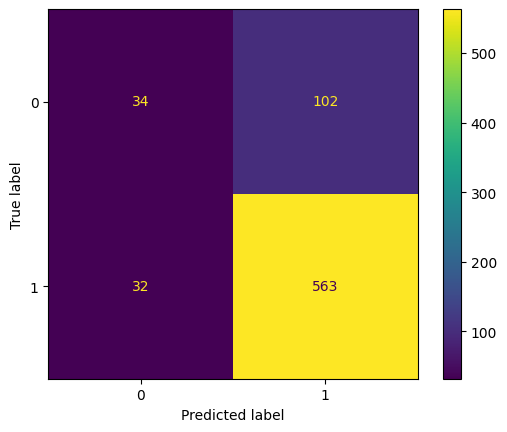

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(5,3))
cm = confusion_matrix(y_val, rfpred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfclf.classes_)
disp.plot()
plt.show()
  


### plot threshold details.

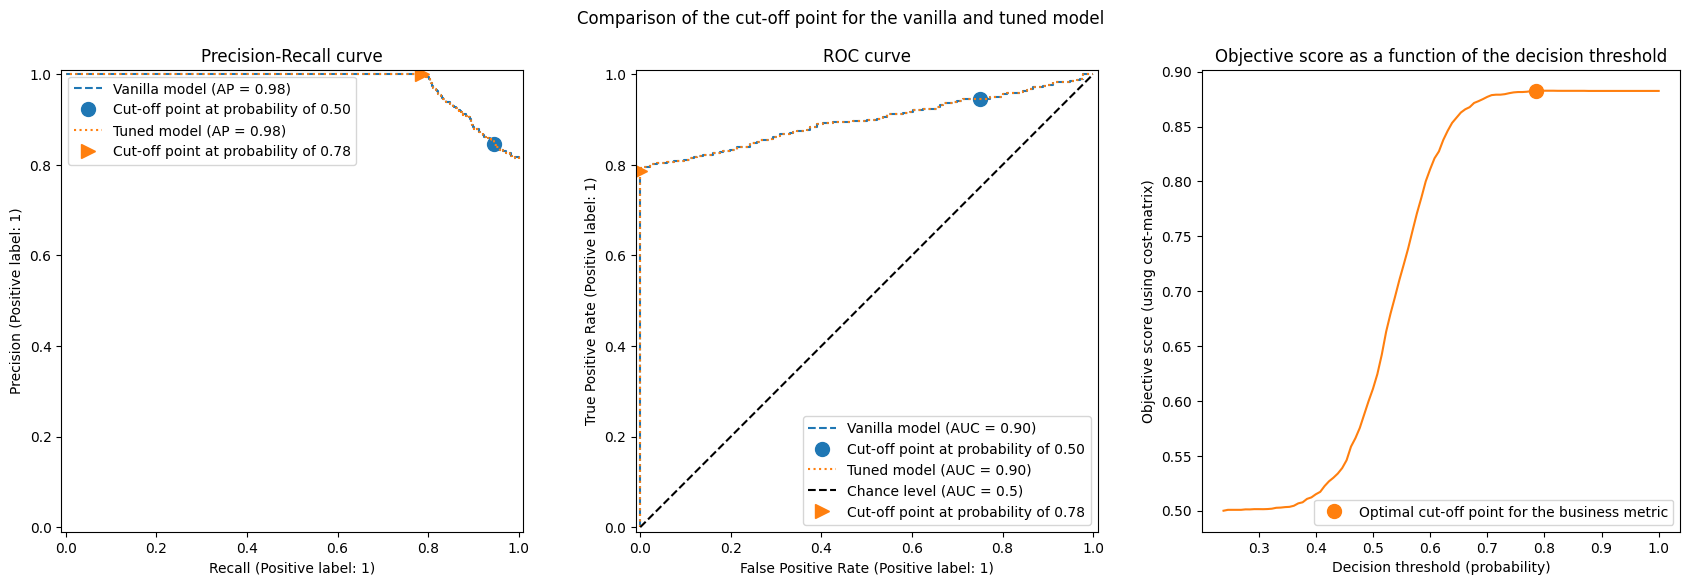

In [30]:
title = "Comparison of the cut-off point for the vanilla and tuned model"
plot_roc_pr_curves(rfclf, tuned_model, title=title)

In [31]:
# thrs_clf = FixedThresholdClassifier(
#     lrpipe, threshold=0.001, response_method='decision_function'
# ).fit(X_train, y_train)

# print(confusion_matrix(y_val, thrs_clf.predict(X_val)))

ROC AUC SCORE:  0.8932773109243697


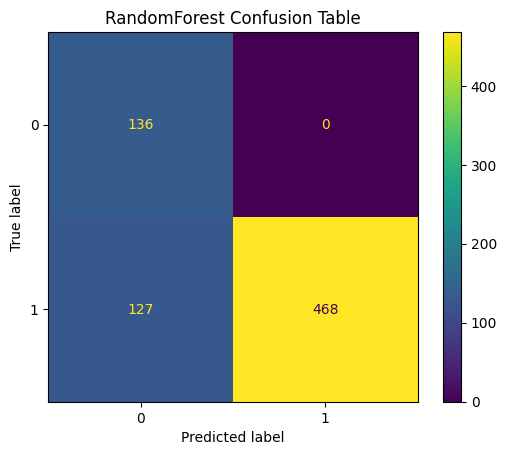

In [32]:
thrs_clf = FixedThresholdClassifier(
    rfclf, threshold=0.85, response_method='predict_proba'
).fit(X_train, y_train)

print('ROC AUC SCORE: ', roc_auc_score(y_val, thrs_clf.predict(X_val)))

cm = confusion_matrix(y_val, thrs_clf.predict(X_val))
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot()
plt.title('RandomForest Confusion Table')
plt.show()


## LightGBM.

In [34]:
test['target'] = lrpipe.predict(testdf[X_train.columns.to_list()])
test['proba'] = rfclf.predict_proba(testdf[X_train.columns.to_list()])[:,1]
test[['Id', 'target']].to_csv('lrsubmission.csv', index=False)

test['target'] = rfclf.predict(testdf[X_train.columns.to_list()])
test[['Id', 'target']].to_csv('rfsubmission.csv', index=False)
test[['Id', 'exang', 'cp', 'thalach', 'target', 'proba']]

,Id,exang,cp,thalach,target,proba
0,16501,1,0,170,1,1.000000
1,10444,1,0,74,1,1.000000
2,14288,1,0,73,1,1.000000
3,10409,1,1,192,1,1.000000
4,17330,0,3,122,1,0.537527
...,...,...,...,...,...,...
2692,14964,0,3,163,1,0.538947
2693,16774,1,1,95,1,1.000000
2694,18884,1,0,170,1,1.000000
2695,10000,1,0,147,1,1.000000


**CONCLUSION.**

The most important factors of *Heart Disease* exercise induced angina(exang), chest pain(cp), 
and maximum heart rate achieved(thalach).



**THANK YOU.**